# Problem Statement : 1.2
# About Dataset
## Context :
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content :
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

## The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## Performance Metrix :
1. The given data set is a classification model.
2. In this data set the performace metrix is Accuracy score.

# Data Import And Data Cleaning

In [1]:
# imported necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io

In [2]:
# giving the path name to import 
%cd "D:\prudent_hackathon\customer_churn"

D:\prudent_hackathon\customer_churn


In [3]:
# Imported the CSV file in the jupyter
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# head is used to display the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# tail is used to display the first 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [6]:
# info is used to know the how many rows,columns and data_type in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
# the given data there is a data no column servies mean it is no 
df.MultipleLines.value_counts(dropna=False)

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [9]:
# we need to impute that no phone servies to NO
df.MultipleLines=df.MultipleLines.str.replace('No phone service','No').astype(object)

In [10]:
# need to change the data type of the column totalcharges 
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '')

In [11]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
# droping the customerid because it is not necessary
df=df.drop(["customerID"],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
# checking Null values
df.isnull().sum()
# so there is no null values and no missing values the data is clean.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df.TotalCharges.value_counts(dropna=False)

TotalCharges
NaN        11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64

In [18]:
df.TotalCharges=df.TotalCharges.fillna(20.20)

# Exploartory Data Analysis

In [19]:
# describe of variables - TotalCharges,tenure,MonthlyCharges.
# describe is used to show the statistics of the data.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765853
std,0.368612,24.559481,30.090047,2266.762876
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<Figure size 3000x1500 with 0 Axes>

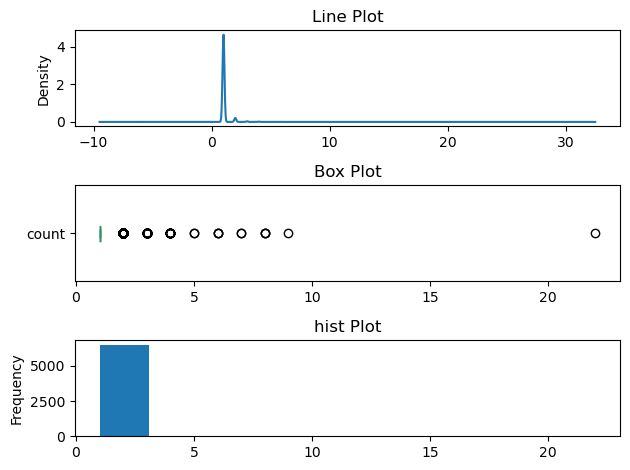

In [20]:
# histogram, boxplot and density Curve - TotalCharges
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)

df.TotalCharges.value_counts().plot(kind='kde',ax=ax[0])
df.TotalCharges.value_counts().plot(kind='box',vert=False,ax=ax[1])
df.TotalCharges.value_counts().plot(kind='hist',ax=ax[2])

# You can add titles or labels for each subplot if needed
ax[0].set_title('Line Plot')
ax[1].set_title('Box Plot')
ax[2].set_title('hist Plot')

plt.tight_layout()  # Ensures the subplots are properly spaced
plt.show()

<Figure size 3000x1500 with 0 Axes>

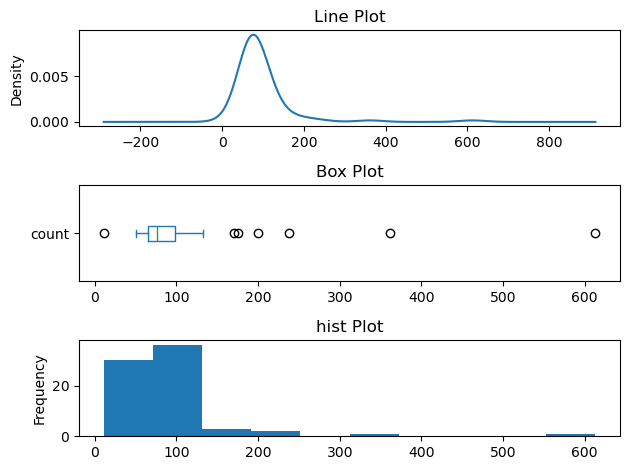

In [21]:
# histogram, boxplot and density Curve - tenure
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)

df.tenure.value_counts().plot(kind='kde',ax=ax[0])
df.tenure.value_counts().plot(kind='box',vert=False,ax=ax[1])
df.tenure.value_counts().plot(kind='hist',ax=ax[2])

# You can add titles or labels for each subplot if needed
ax[0].set_title('Line Plot')
ax[1].set_title('Box Plot')
ax[2].set_title('hist Plot')

plt.tight_layout()  # Ensures the subplots are properly spaced
plt.show()

# Data Aggrigation
1. value_counts
2. crosstab
3. groupby

<Axes: ylabel='count'>

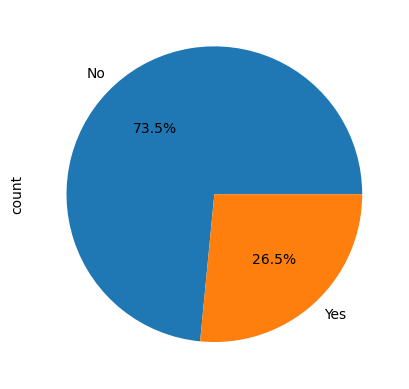

In [22]:
# Frequency Counts & Pie Chart - Churn
df.Churn.value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

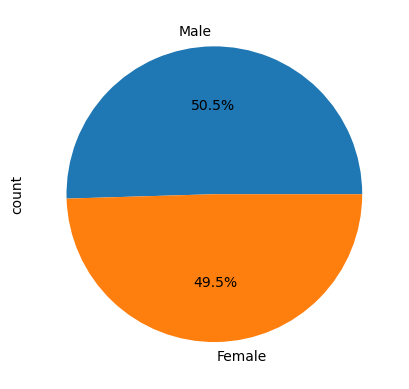

In [23]:
# Frequency Counts & Pie Chart - gender
df.gender.value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

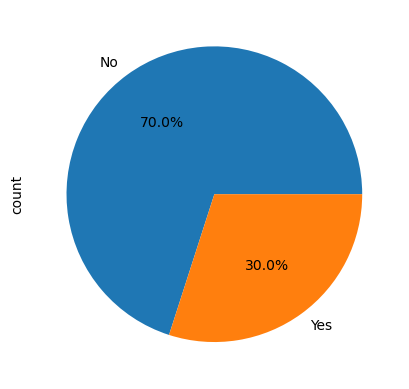

In [24]:
# Frequency Counts & Pie Chart -Dependents
df.Dependents.value_counts().plot(kind='pie',autopct='%0.1f%%')

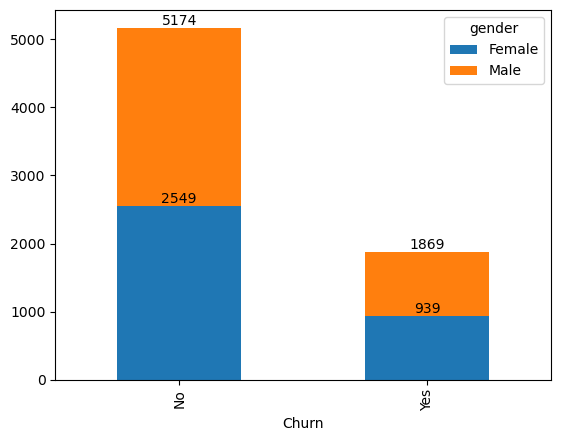

In [25]:
# Cross Tabulation & Stacked Bar Plot- Churn & gender
ax=pd.crosstab(df.Churn,df.gender).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)


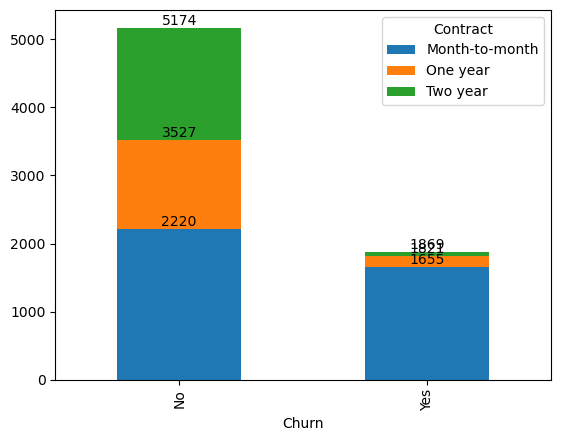

In [26]:
# Cross Tabulation & Stacked Bar Plot- Churn & Contract
ax=pd.crosstab(df.Churn,df.Contract).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)


In [27]:
# groupby() - mean of following - tenure and gender
df.tenure.groupby(df.gender).mean()

gender
Female    32.244553
Male      32.495359
Name: tenure, dtype: float64

In [28]:
# groupby() - mean of following -  tenure and Contract
df.tenure.groupby(df.Contract).mean()

Contract
Month-to-month    18.036645
One year          42.044807
Two year          56.735103
Name: tenure, dtype: float64

In [29]:
# groupby() - mean of following 
# TotalCharges and InternetService
df.TotalCharges.groupby(df.InternetService).mean()

InternetService
DSL            2115.453057
Fiber optic    3205.304570
No              662.684207
Name: TotalCharges, dtype: float64

# Hypothesis Testing

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# T-test_ind
This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [31]:
# Test Null Average tenure of Churn Yes/No Equal
df.tenure.groupby(df.Churn).mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [32]:
Yes= df[df.Churn=='Yes']
No= df[df.Churn=='No']

In [33]:
from scipy.stats import ttest_ind

In [34]:
ttest_ind(Yes.tenure,No.tenure,equal_var=True)
#since pvalue=7.99905796059022e-205 is Lesser than 0.05 reject null
# alternative hypothesis true, there is no significance difference between tenure of Churn

TtestResult(statistic=-31.57955051135377, pvalue=7.99905796059022e-205, df=7041.0)

In [35]:
df.TotalCharges.groupby(df.Churn).mean()

Churn
No     2549.954387
Yes    1531.796094
Name: TotalCharges, dtype: float64

In [36]:
# Test Null Average TotalCharges of Churn Yes/No Equal
ttest_ind(Yes.TotalCharges,No.TotalCharges,equal_var=True)
#since pvalue=nan is nan 

TtestResult(statistic=-16.979771586311724, pvalue=2.0929565592324866e-63, df=7041.0)

# ANOVA TEST
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [37]:
# Test Null Average tenure of different Payment Method Equal
df.tenure.groupby(df.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    43.656736
Credit card (automatic)      43.269382
Electronic check             25.174630
Mailed check                 21.830025
Name: tenure, dtype: float64

In [38]:
B_auto= df[df.PaymentMethod=='Bank transfer (automatic)']
C_auto= df[df.PaymentMethod=='Credit card (automatic)']
El_c=   df[df.PaymentMethod=='Electronic check']
Mail_c= df[df.PaymentMethod=='Mailed check']

In [39]:
from scipy.stats import f_oneway

In [40]:
f_oneway(B_auto.tenure,C_auto.tenure,El_c.tenure,Mail_c.tenure)
# since pvalue=1.503848361277172e-265 is less than 0.05 reject null
# alternative hypothesis true, there is no significance difference between tenure of Paymentmethod

F_onewayResult(statistic=446.4668862479716, pvalue=1.503848361277172e-265)

In [41]:
df.TotalCharges.groupby(df.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    3075.336982
Credit card (automatic)      3069.391294
Electronic check             2090.868182
Mailed check                 1049.350993
Name: TotalCharges, dtype: float64

In [42]:
f_oneway(B_auto.TotalCharges,C_auto.TotalCharges,El_c.TotalCharges,Mail_c.TotalCharges)
# since pvalue=nan


F_onewayResult(statistic=329.11839098201875, pvalue=5.414821286666936e-200)

# ChiSquare Test
The chi-square test tests the null hypothesis that the categorical data has the given frequencies.

In [43]:
#null- there is no association between both variables
#alt - there is association between both variables

In [44]:
# Test Null No Association between Churn and Contract
pd.crosstab(df.Churn,df.Contract)

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [45]:
from scipy.stats import chi2_contingency

In [46]:
chi2_contingency(pd.crosstab(df.Churn,df.Contract))
# since pvalue=5.863038300673391e-258 is less than 0.05 reject null
# null hypothesis is true so there is no assosciation between Churn and Contract

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [47]:
# Test Null No Association between Churn and Payment Method
pd.crosstab(df.Churn,df.PaymentMethod)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


In [48]:
chi2_contingency(pd.crosstab(df.Churn,df.PaymentMethod))
# since pvalue=3.6823546520097993e-140 is less than 0.05 reject null
# null hypothesis is true so there is no assosciation between Churn and PaymentMethod

Chi2ContingencyResult(statistic=648.1423274814, pvalue=3.6823546520097993e-140, dof=3, expected_freq=array([[1134.26891949, 1118.10705665, 1737.40025557, 1184.22376828],
       [ 409.73108051,  403.89294335,  627.59974443,  427.77623172]]))

In [49]:
# Test Null No Association between Churn and TechSupport
pd.crosstab(df.Churn,df.TechSupport)

TechSupport,No,No internet service,Yes
Churn,,,
No,2027,1413,1734
Yes,1446,113,310


In [50]:
chi2_contingency(pd.crosstab(df.Churn,df.TechSupport))
# since pvalue=3.6823546520097993e-140 is less than 0.05 reject null
# null hypothesis is true so there is no assosciation between Churn and TechSupport

Chi2ContingencyResult(statistic=828.1970684587393, pvalue=1.4430840279999813e-180, dof=2, expected_freq=array([[2551.37043873, 1121.04557717, 1501.5839841 ],
       [ 921.62956127,  404.95442283,  542.4160159 ]]))

# Split data into NUMCOLS and OBJCOLS for model building

In [51]:
numcols=df.select_dtypes(include=np.number)
objcols=df.select_dtypes(include='object')

In [52]:
numcols.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


# Data Preprocessing

# Scaling of Numeric columns
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

# Standard Scaler

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()

In [55]:
numcols_scaled=scaler.fit_transform(numcols)

In [56]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [57]:
numcols_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992638
1,-0.439916,0.066327,-0.259629,-0.172181
2,-0.439916,-1.236724,-0.362660,-0.958093
3,-0.439916,0.514251,-0.746535,-0.193689
4,-0.439916,-1.236724,0.197365,-0.938901


# MinMaxScaler

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
minmax=MinMaxScaler()

In [60]:
numcols_minmax=minmax.fit_transform(numcols)

In [61]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [62]:
numcols_minmax.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.013889,0.115423,0.001275
1,0.0,0.472222,0.385075,0.215867
2,0.0,0.027778,0.354229,0.010310
3,0.0,0.625000,0.239303,0.210241
4,0.0,0.027778,0.521891,0.015330


# RobustScaler

In [63]:
from sklearn.preprocessing import RobustScaler

In [64]:
robust=RobustScaler()

In [65]:
numcols_robust=robust.fit_transform(numcols)

In [66]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [67]:
numcols_robust.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,-0.608696,-0.745170,-0.402798
1,0.0,0.108696,-0.246550,0.146087
2,0.0,-0.586957,-0.303588,-0.379687
3,0.0,0.347826,-0.516099,0.131698
4,0.0,-0.586957,0.006440,-0.366848


In [68]:
objcols.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [69]:
# we need to drop Churn from Objectcols beacause it is a predictive variable
objcols=objcols.drop(['Churn'],axis=1)

<Axes: >

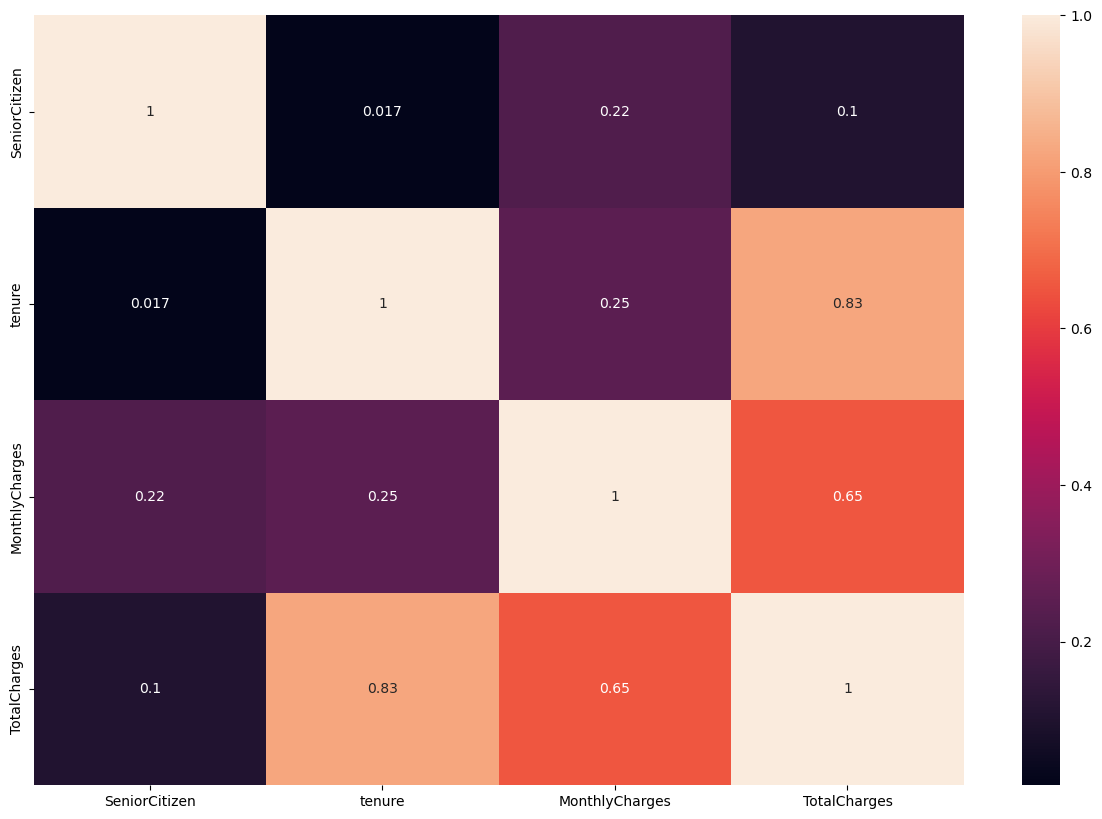

In [70]:
# Heat Map
plt.figure(figsize=(15,10))
sns.heatmap(numcols.corr(),annot=True)
# by checking the heat map we know that if the value is greater than 0.95 we need to droop that column 
# in this there is no value is 0.95 

# Dummy Encoding for Object columns
Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables)

In [71]:
obj_dummies=pd.get_dummies(objcols)

In [72]:
obj_dummies.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,True,False,False,True,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
1,False,True,True,False,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,False,True,True,False,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,False,True,True,False,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,True,False,True,False,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False


In [73]:
# replacing the variable values with True:1,False:0 because we want the data in binary from
obj_dummies.replace({True:1,False:0},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15728\2909701638.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obj_dummies.replace({True:1,False:0},inplace=True)


In [74]:
obj_dummies.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [75]:
y=df.Churn
X=pd.concat([numcols_minmax,obj_dummies],axis=1)

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   tenure                                   7043 non-null   float64
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   int64  
 5   gender_Male                              7043 non-null   int64  
 6   Partner_No                               7043 non-null   int64  
 7   Partner_Yes                              7043 non-null   int64  
 8   Dependents_No                            7043 non-null   int64  
 9   Dependents_Yes                           7043 non-null   int64  
 10  PhoneService_No                          7043 no

# Label Encoding For Dependent variable (y)

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
ln=LabelEncoder()

In [79]:
y=ln.fit_transform(y)

<Axes: xlabel='Churn'>

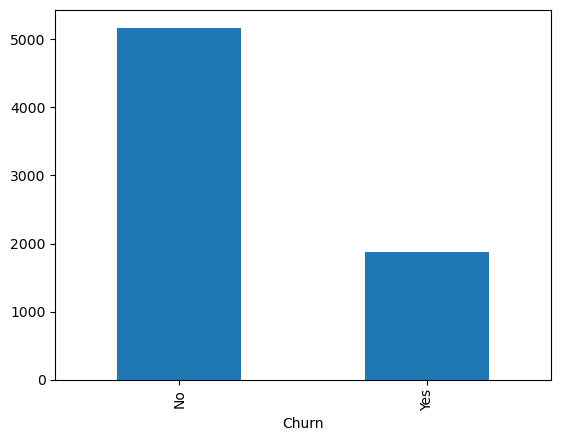

In [80]:
df.Churn.value_counts().plot(kind='bar')
# here we can know that the data is imbalanced 
# Imbalanced data refers to a dataset within which one or some of the classes have a much greater number of examples than the others.
# Normally the data should be in an order that the 'yes' should be more and 'No' should be less then we need to consider it as balanced 
# so in this case the data is reverse so it is imbalance

In [81]:
# for imblance data we need to use SMOTE
from imblearn.over_sampling import SMOTEN

In [82]:
smote=SMOTEN(random_state=42)

In [83]:
X_smote,y_smote=smote.fit_resample(X,y)

In [84]:
print(pd.DataFrame(y).value_counts())

0
0    5174
1    1869
Name: count, dtype: int64


In [85]:
print(pd.DataFrame(y_smote).value_counts())

0
0    5174
1    5174
Name: count, dtype: int64


# Model Building

## Building Necessary Classification Models`

# Binary Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logit=LogisticRegression(max_iter=1000)

In [88]:
logitmodel=logit.fit(X_smote,y_smote)

In [89]:
logitmodel.score(X_smote,y_smote)#r square

0.8449942017781213

In [90]:
logit_predict=logitmodel.predict(X_smote)

In [91]:
pd.crosstab(y_smote,logit_predict)

col_0,0,1
row_0,,
0,4420,754
1,850,4324


In [92]:
logitid=y_smote-logit_predict

In [93]:
from sklearn.metrics import classification_report,RocCurveDisplay

In [94]:
print(classification_report(y_smote,logit_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      5174
           1       0.85      0.84      0.84      5174

    accuracy                           0.84     10348
   macro avg       0.85      0.84      0.84     10348
weighted avg       0.85      0.84      0.84     10348



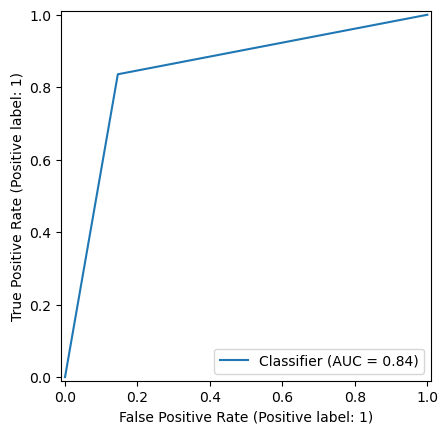

In [95]:
RocCurveDisplay.from_predictions(y_smote,logit_predict)

# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
tree=DecisionTreeClassifier(max_depth=4)

In [98]:
treemodel=tree.fit(X_smote,y_smote)

In [99]:
treemodel.score(X_smote,y_smote)

0.7935833011209895

In [100]:
treepredict=treemodel.predict(X_smote)

In [101]:
pd.crosstab(y_smote,treepredict)

col_0,0,1
row_0,,
0,4263,911
1,1225,3949


In [102]:
treeid=y_smote-treepredict

In [103]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5174
           1       0.81      0.76      0.79      5174

    accuracy                           0.79     10348
   macro avg       0.79      0.79      0.79     10348
weighted avg       0.79      0.79      0.79     10348



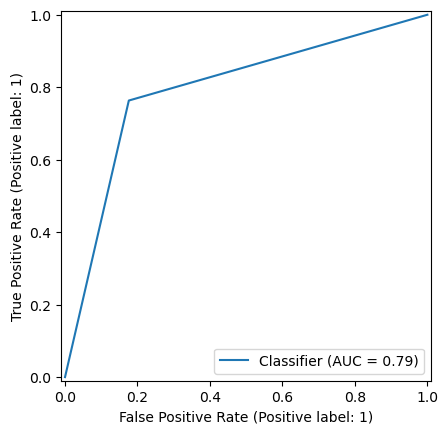

In [104]:
RocCurveDisplay.from_predictions(y_smote,treepredict)

# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf=RandomForestClassifier(n_estimators=100,max_depth=2)

In [141]:
rfmodel=rf.fit(X_smote,y_smote)

In [142]:
rfmodel.score(X_smote,y_smote)

0.7775415539234635

In [143]:
rfpredict=rfmodel.predict(X_smote)

In [144]:
pd.crosstab(y_smote,rfpredict)

col_0,0,1
row_0,,
0,3817,1357
1,945,4229


In [145]:
rfid=y_smote-rfpredict

In [152]:
print(classification_report(y_smote,rfpredict))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      5174
           1       0.76      0.82      0.79      5174

    accuracy                           0.78     10348
   macro avg       0.78      0.78      0.78     10348
weighted avg       0.78      0.78      0.78     10348



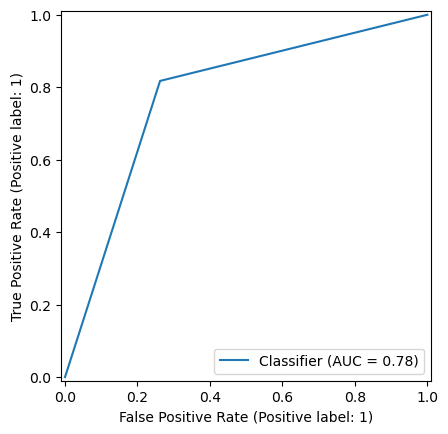

In [146]:
RocCurveDisplay.from_predictions(y_smote,rfpredict)

# Gradient Boosting

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
gb=GradientBoostingClassifier()

In [122]:
gbmodel=gb.fit(X_smote,y_smote)

In [123]:
gbmodel.score(X_smote,y_smote)

0.860939311944337

In [124]:
gbpredict=gbmodel.predict(X_smote)

In [125]:
pd.crosstab(y_smote,gbpredict)

col_0,0,1
row_0,,
0,4444,730
1,709,4465


In [126]:
gbid=y_smote-gbpredict

In [153]:
print(classification_report(y_smote,gbpredict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5174
           1       0.86      0.86      0.86      5174

    accuracy                           0.86     10348
   macro avg       0.86      0.86      0.86     10348
weighted avg       0.86      0.86      0.86     10348



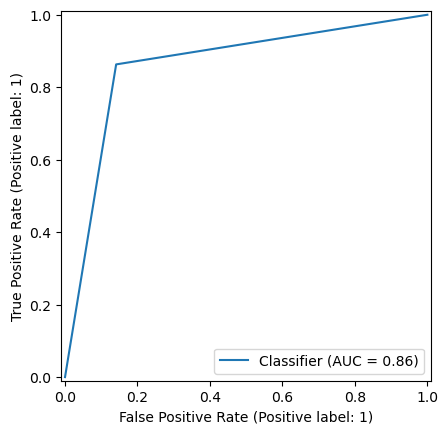

In [127]:
RocCurveDisplay.from_predictions(y_smote,gbpredict)

# Support Vector Classifier

In [128]:
from sklearn.svm import SVC

In [129]:
svc=SVC(C=5)

In [130]:
svcmodel=svc.fit(X_smote,y_smote)

In [131]:
svcmodel.score(X_smote,y_smote)

0.885195206803247

In [132]:
svcpredict=svc.predict(X_smote)

In [133]:
pd.crosstab(y_smote,svcpredict)

col_0,0,1
row_0,,
0,4649,525
1,663,4511


In [154]:
scid=y_smote-svcpredict

In [155]:
print(classification_report(y_smote,svcpredict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5174
           1       0.90      0.87      0.88      5174

    accuracy                           0.89     10348
   macro avg       0.89      0.89      0.89     10348
weighted avg       0.89      0.89      0.89     10348



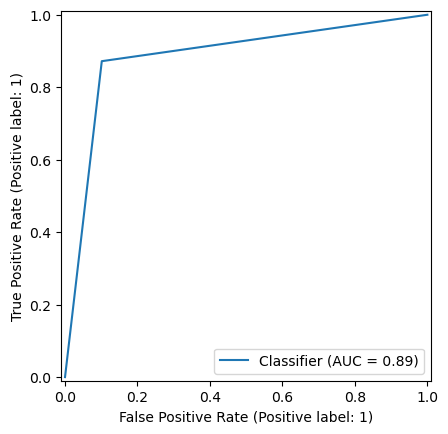

In [135]:
RocCurveDisplay.from_predictions(y_smote,svcpredict)

# Accuracies for different machine learning models:

| Model Name | Accuracy |
|--|--|
| Logistic Regression | 0.8449942017781213 | 
| Decision Tree | 0.7935833011209895 |
| Random Forest | 0.7775415539234635 |
| Gradient Boosting Machine| 0.860939311944337 |
| Support Vector Machine | 0.885195206803247 |

# Based on the provided accuracies, 
## the best fit model:
the best fit model is **Random Forest** with an accuracy of **0.7775415539234635**. This model has the lowest accuracy amonng the ones listed. Random forest is known for its ability to produce highly accurate predictions by combining the outputs of multiple weak learners (often decision trees) to improve overall predictive performance.

In [161]:
# Joblib module in Python is especially used to execute tasks parallelly using Pipelines rather than executing them sequentially one after another. 
# Joblib module lets the user use the full potential of their devices by utilizing all the cores 
#present in their device to make the process as fast as possible.

import joblib
joblib.dump(rfmodel,'rf.sav')

['rf.sav']